<a href="https://colab.research.google.com/github/reinanovazania/reinanovazania/blob/main/Tugas1GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

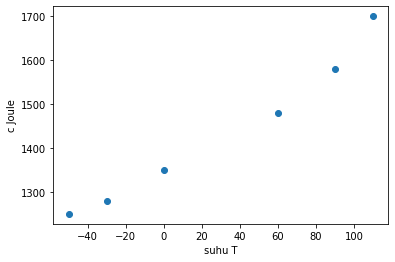

Theta is:  [[1360.32110092]
 [   2.6559633 ]]
Y prediction is:  [[4973.28402491]
 [1367.37524198]]


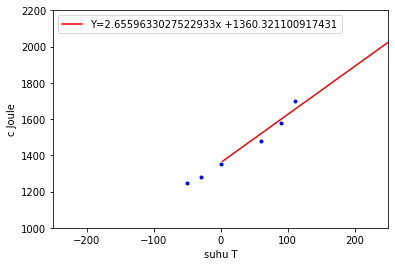

slope:
 [[-2.35881754e+18]
 [-3.56380525e+20]]


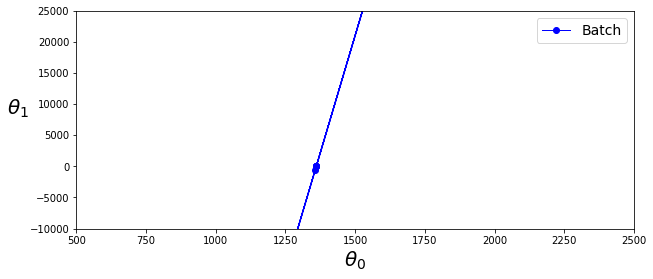

intercept & coef:
 [-7.04075403e+10] [3.00457743e+12]


In [ ]:
#reina novazania - 2206107786 - Manajemen Telekomunikasi
#tugas 1 GradientDescent (no2)
  
import numpy as np # numpy is for vector and mathematics operations
import matplotlib.pyplot as plt # matplotlib is for plotting
from sklearn.datasets import make_regression # scikitlearn is for machine learning related tools
from sklearn.linear_model import SGDRegressor
%matplotlib inline

# Create data set.
n = 6 # The number of data sets
X = [[-50], [-30], [0], [60], [90], [110]]
y = [[1250], [1280], [1350], [1480], [1580], [1700]]

plt.scatter(X,y)
plt.xlabel("suhu T")
plt.ylabel("c Joule")
plt.show()

X_b = np.c_[np.ones((6, 1)), X] # set x_0 = 1 according to the linear regression. Then, the matrix dimension of X_b is n x 2. np.c_ is a concantenate function from numpy, which combines two vectors.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Find \theta value using normal equation
print("Theta is: ", theta_best)

X_new = np.array(theta_best) # generate a vector sample that has 0 and 2 elements
X_new_b = np.c_[np.ones((2, 1)), X_new] # set x_0 = 1 according to the linear regression. Then, the matrix dimension of X_b is 2 x 2 
y_predict = X_new_b.dot(theta_best) # y = X.\theta_{best}. We want to see the prediction.
print("Y prediction is: ", y_predict) 
arr = np.array(theta_best)

plt.plot(X_new, y_predict, "r-", label = "Y=" + str(arr.item((1, 0)))+"x +"+ str(arr.item((0, 0)))) # red line is from the linear regression
plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("suhu T")
plt.ylabel("c Joule")
plt.axis([-250, 250, 1000, 2200])
plt.show()

# Gradient Descent - Batch
# (Batch: math includes full training set X.)

# need to find partial derivative (slope) of the cost function
# for each model parameter (theta).

theta_path_bgd = []

eta = 0.1 # learning rate
n_iterations = 12 #sampling 6x2 (x,y)
m = 6

theta = np.array(theta_best) #input thetabest menjadi theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

print("slope:\n", theta)

theta_path_bgd = np.array(theta_path_bgd)
plt.figure(figsize=(10,4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([500, 2500, -10000, 25000])
#save_fig("gradient_descent_paths_plot")
plt.show()


# SGD Regression using Scikit:

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=12, penalty=None, eta0=0.1)
train_y = np.array(y).astype(int)
sgd_reg.fit(X, train_y.ravel())

print("intercept & coef:\n", sgd_reg.intercept_, sgd_reg.coef_)
